In [1]:
from pathlib import Path
import pandas as pd
from config.config_modeling import CAT_COLS, TRAIN_SIZE, TEST_FROM_VAL, RANDOM_STATE
from src.modeling.create_data_split import split_data
from src.utils.models_pkl import load_pickle
from src.fairness.FPDP import (
    fairness_pdp_cat,
    fairness_pdp_num,
    fairness_pdp_ohe,
    fpdp_dataset,
    remove_sensitive_variable,
)
from src.explanation.global_.utils import get_underscore, ohe_filter
import warnings

<Figure size 640x480 with 0 Axes>

In [2]:
warnings.filterwarnings("ignore")

# Initializing all the features 

In [3]:
IN_PATH = Path("..") / ".." / "data" / "data_plain.csv"
MODEL_PATH = Path("..") / ".." / "models" / "XGB.pkl"

NUM_COLS = ["Year", "Fail.Obey.Signals", "Speeding", "Obey.Police.Doc.Light"]

In [4]:
data = pd.read_csv(IN_PATH)
model = load_pickle(MODEL_PATH)

In [5]:
ohe_data = split_data(
    cols=CAT_COLS,
    df=data,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
)

X_train = ohe_data["train"][0]
Y_train = ohe_data["train"][1]
X_test = ohe_data["test"][0]

In [6]:
cols = X_train.columns.values.tolist()
underscore = get_underscore(cols)
underscore_cols = underscore[0]
non_underscore_cols = underscore[1]
ohe_results = ohe_filter(non_underscore_cols, underscore_cols)
non_ohe = [element[0] for element in ohe_results[0]]
ohe = ohe_results[1]
for col in NUM_COLS: 
    non_ohe.remove(col)

# Gender

In [7]:
sensitive_topic = "Gender"
sensitive_values = fpdp_dataset(
    data, sensitive_topic, cat_cols=CAT_COLS, train_size=TRAIN_SIZE, test_size=TEST_FROM_VAL
)
ohe = remove_sensitive_variable(ohe, sensitive_topic)

### One Hot Econded variables

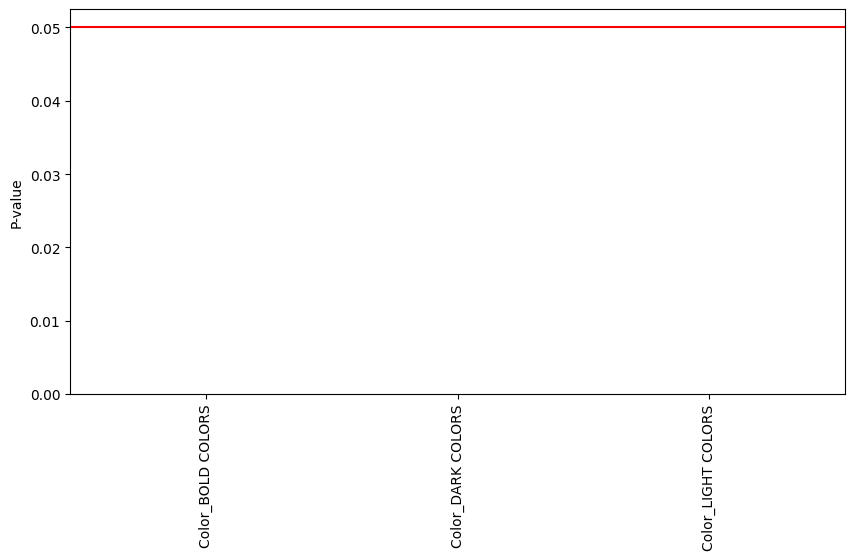

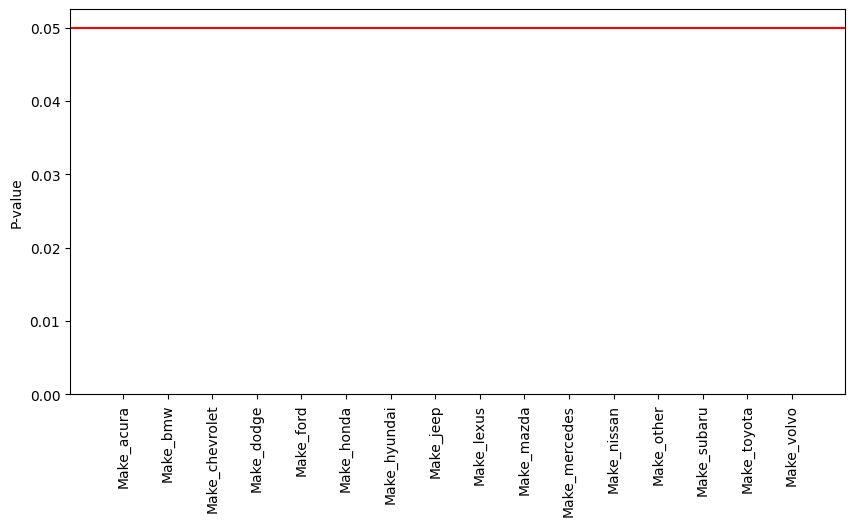

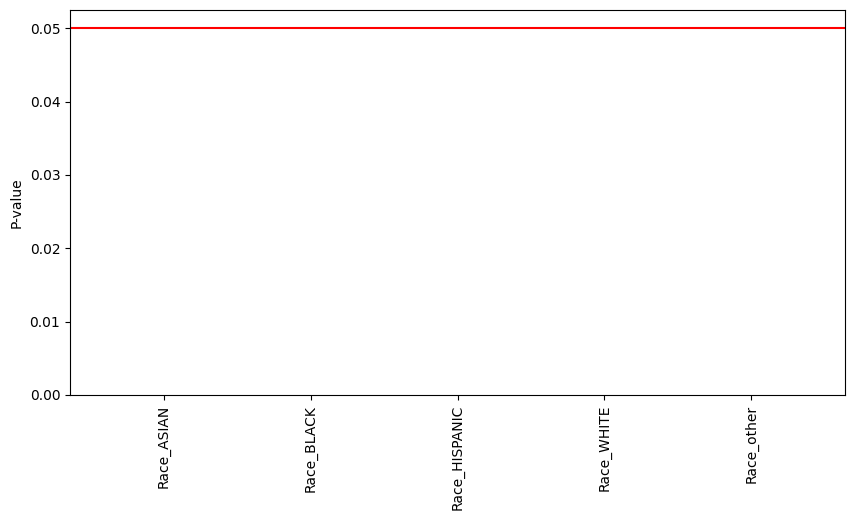

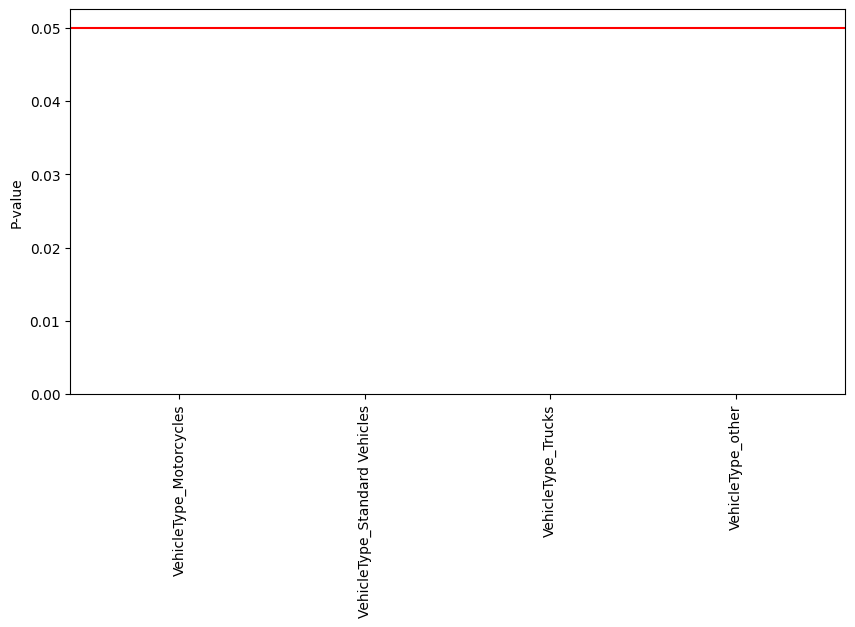

In [8]:
for element in ohe:
    fairness_pdp = fairness_pdp_ohe(
        model,
        feature_names=element,
        protected_group="F",
        X=X_test,
        sensitive_values=sensitive_values,
        fig_size=(10, 5),
        p_value_threshold=0.05,
    )

### Categorical, not one hot encoded variables

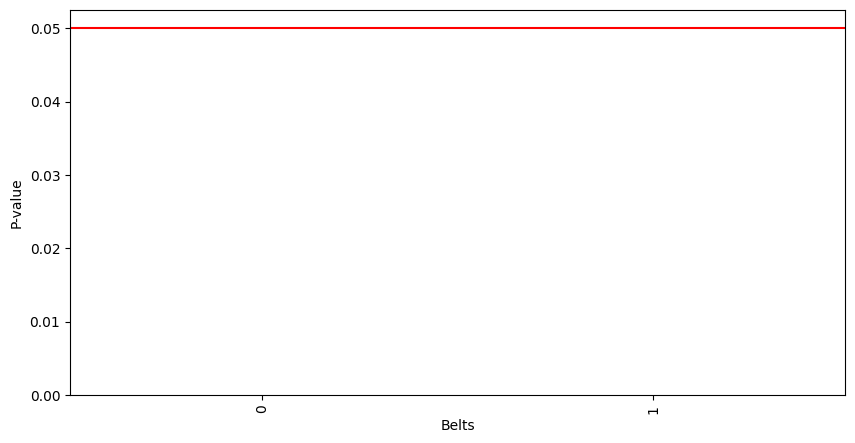

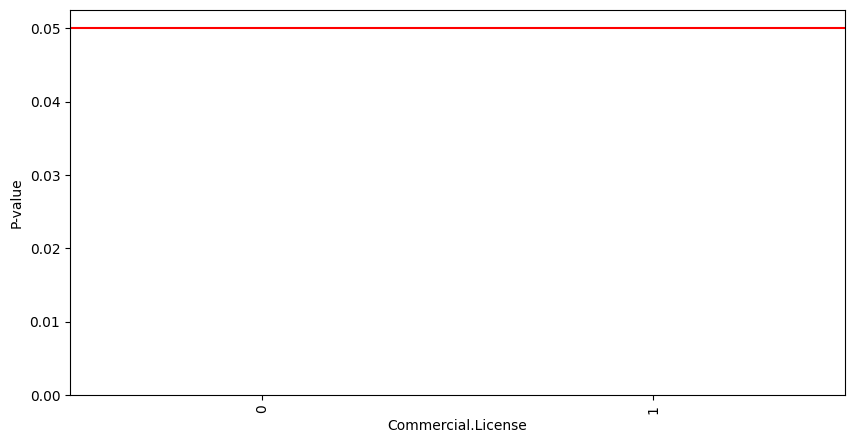

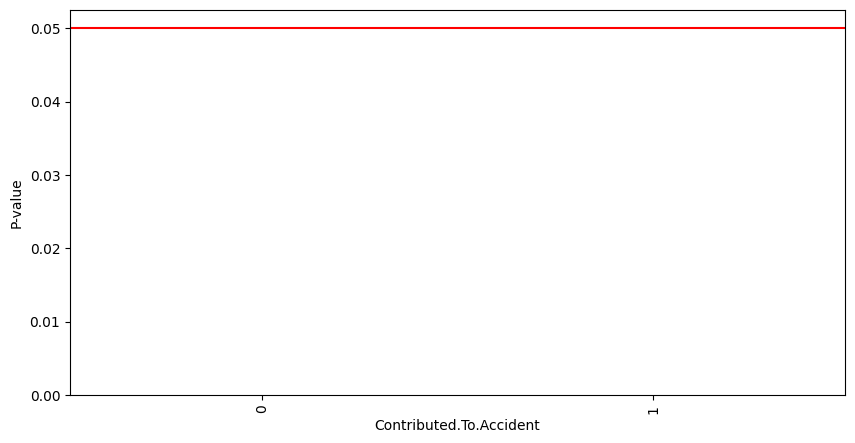

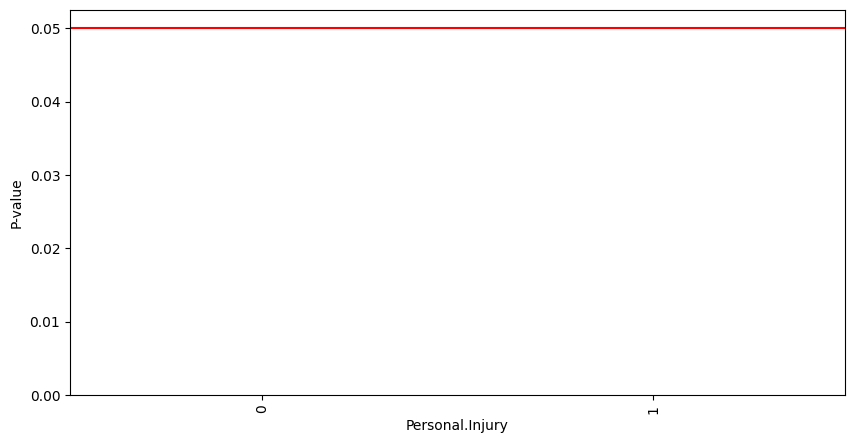

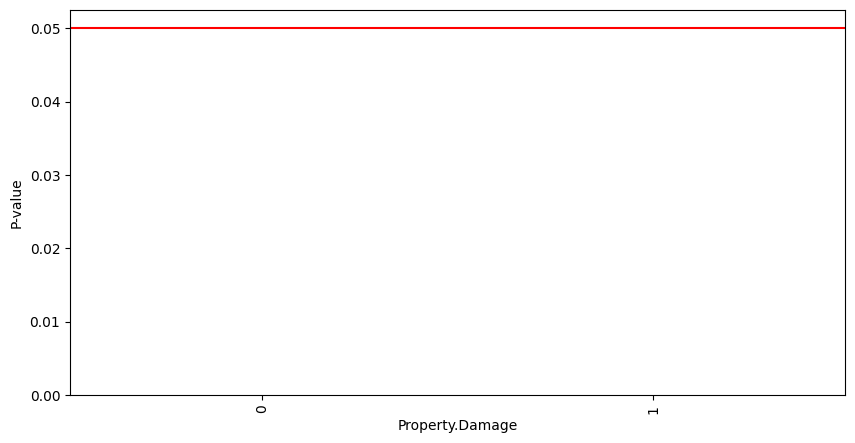

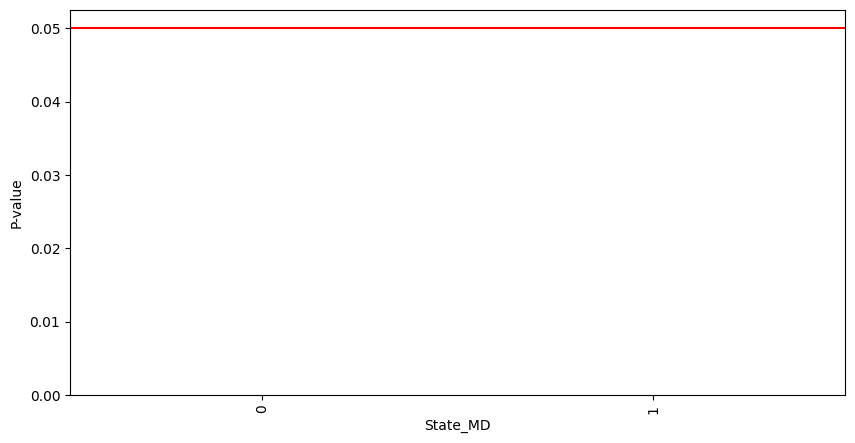

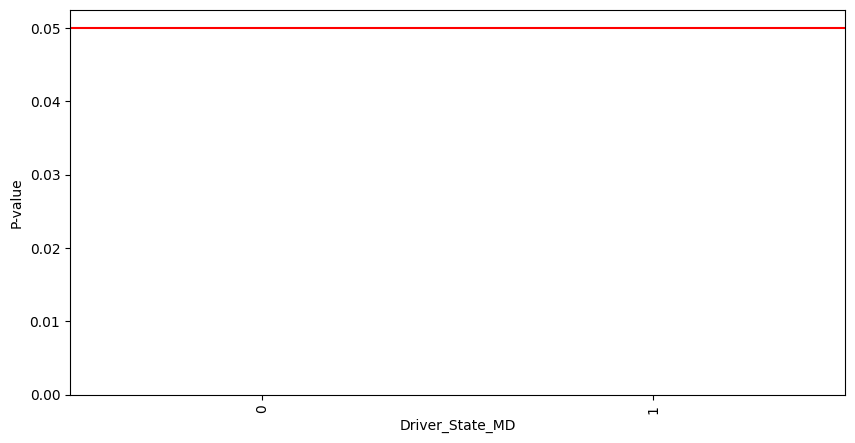

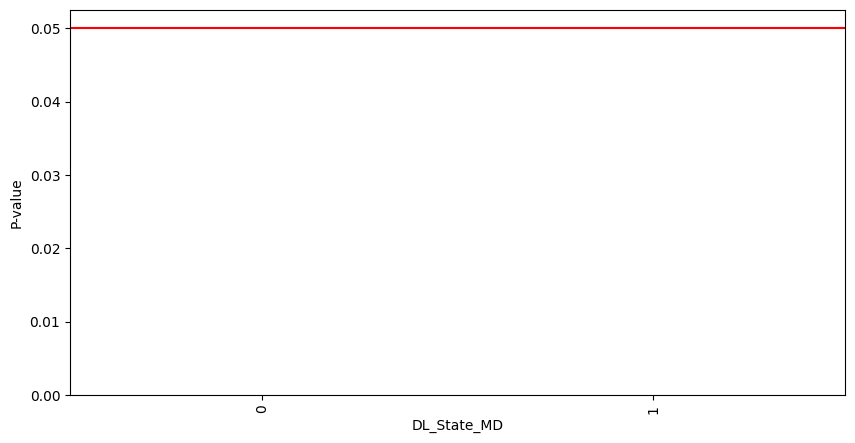

In [9]:
for element in non_ohe:
    fairness_pdp = fairness_pdp_cat(
        model,
        feature=element,
        protected_group="F",
        X=X_test,
        sensitive_values=sensitive_values,
        fig_size=(10, 5),
        p_value_threshold=0.05,
        x_label=element,
    )

### Numerical variables

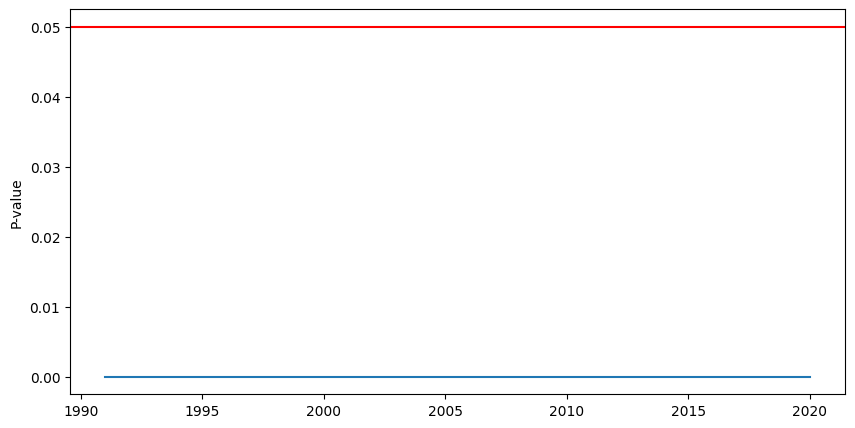

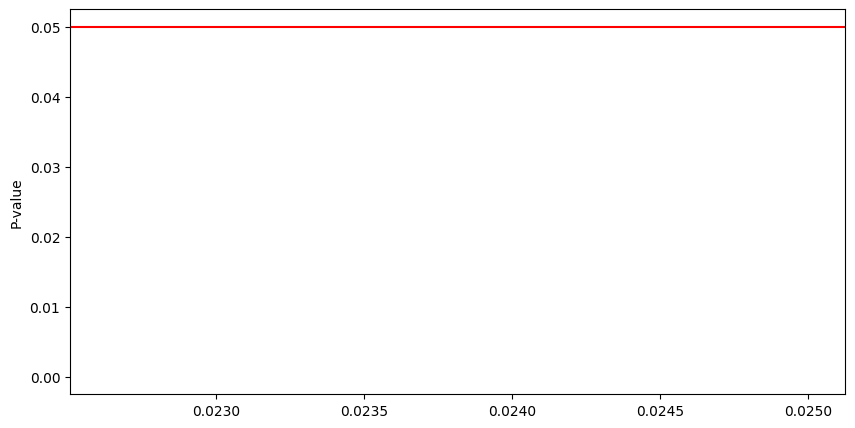

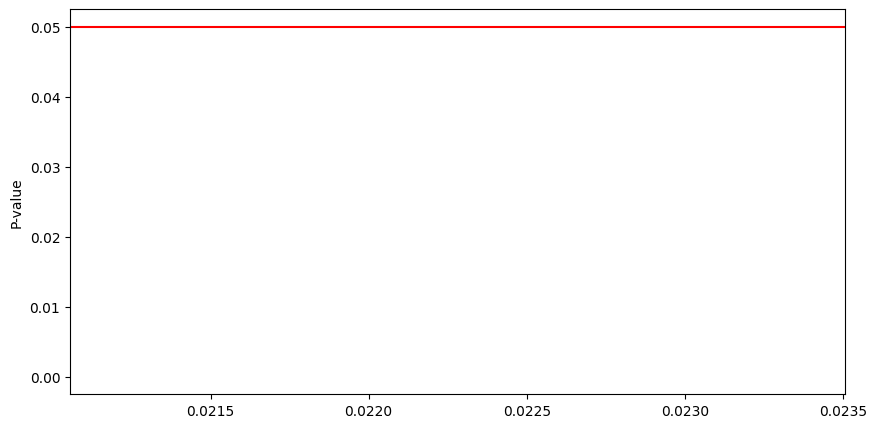

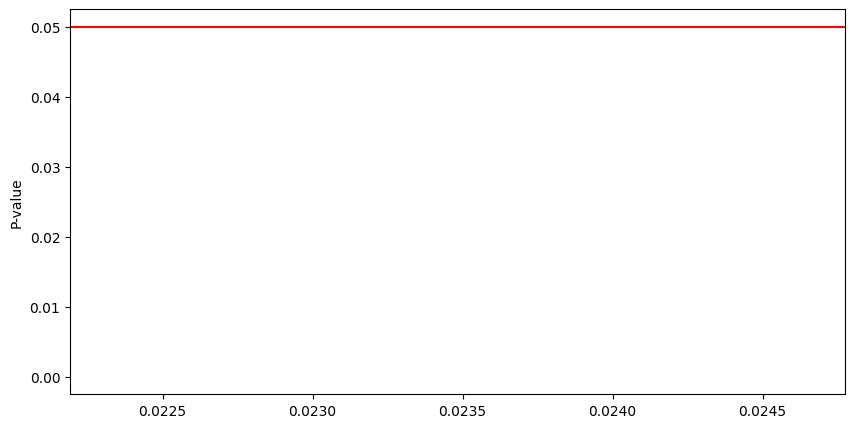

In [10]:
for col in NUM_COLS:
    Year_FPDP = fairness_pdp_num(
        model=model,
        feature=col,
        step=1.0,
        protected_group="F",
        X=X_test,
        sensitive_values=sensitive_values,
        fig_size=(10, 5),
        p_value_threshold=0.05,
    )

# Race

In [11]:
# resetting ohe
ohe = ohe_results[1]

In [12]:
sensitive_topic = "Race"
sensitive_values = fpdp_dataset(
    data, sensitive_topic, cat_cols=CAT_COLS, train_size=TRAIN_SIZE, test_size=TEST_FROM_VAL
)
ohe = remove_sensitive_variable(ohe, sensitive_topic)

### One Hot Encoded variables

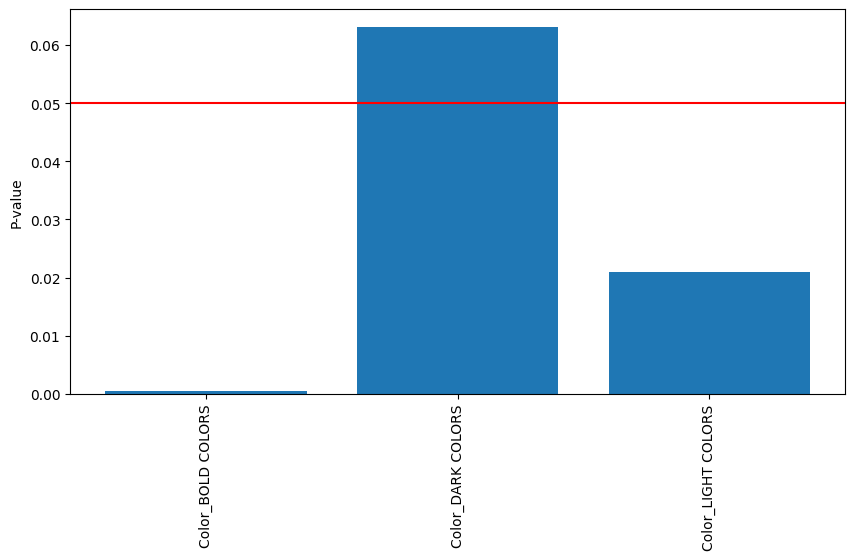

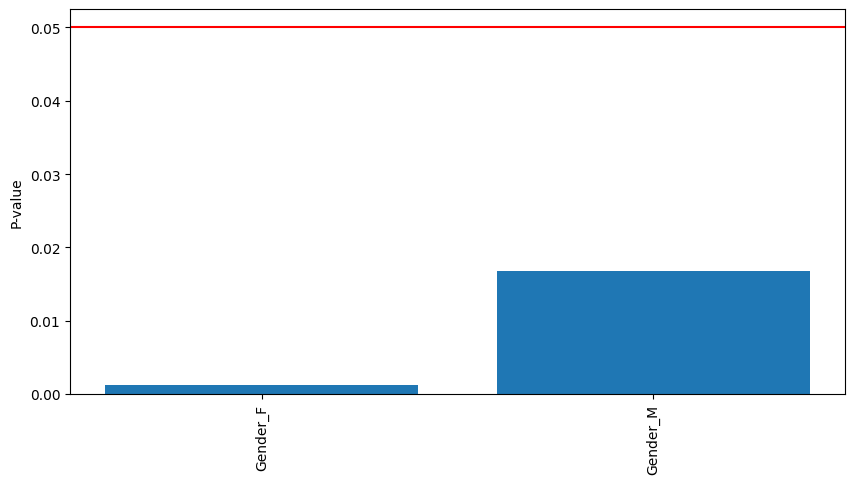

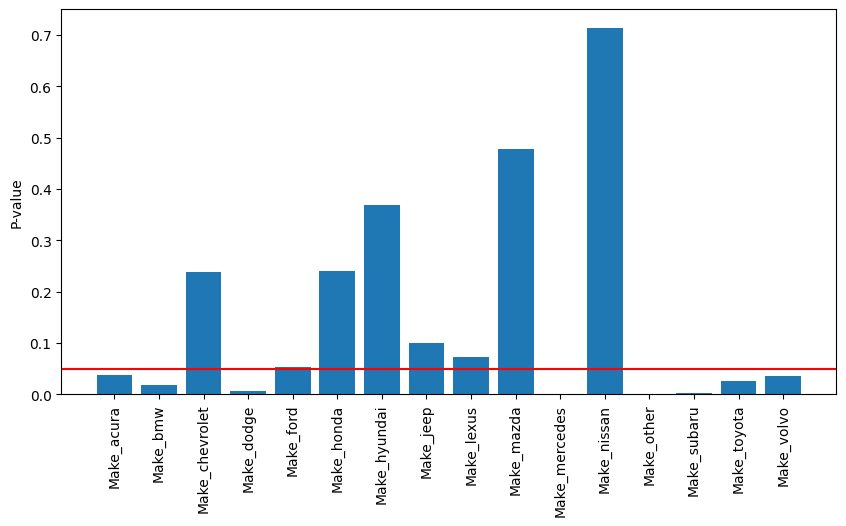

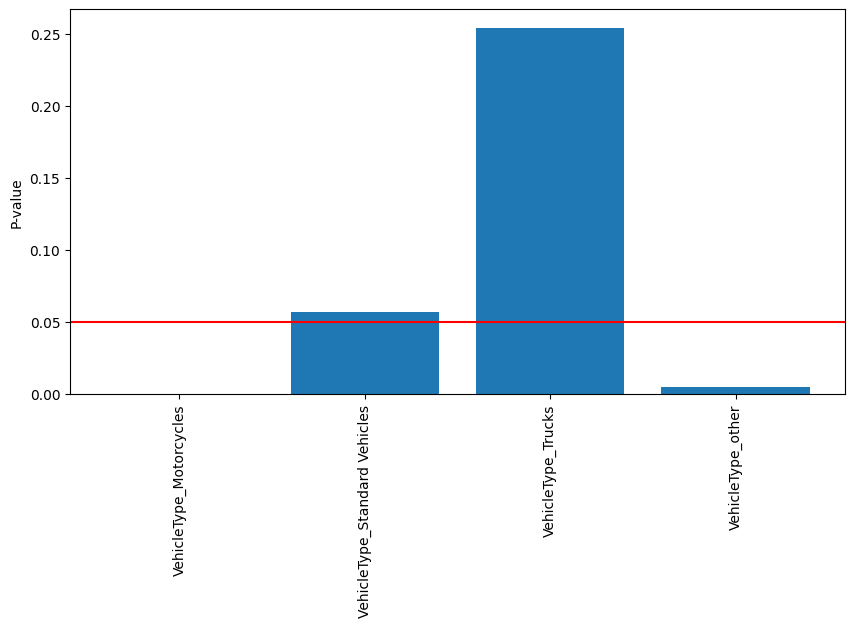

In [13]:
for element in ohe:
    fairness_pdp = fairness_pdp_ohe(
        model,
        feature_names=element,
        protected_group="BLACK",
        X=X_test,
        sensitive_values=sensitive_values,
        fig_size=(10, 5),
        p_value_threshold=0.05,
    )

### Categorical, not one hot encoded variables

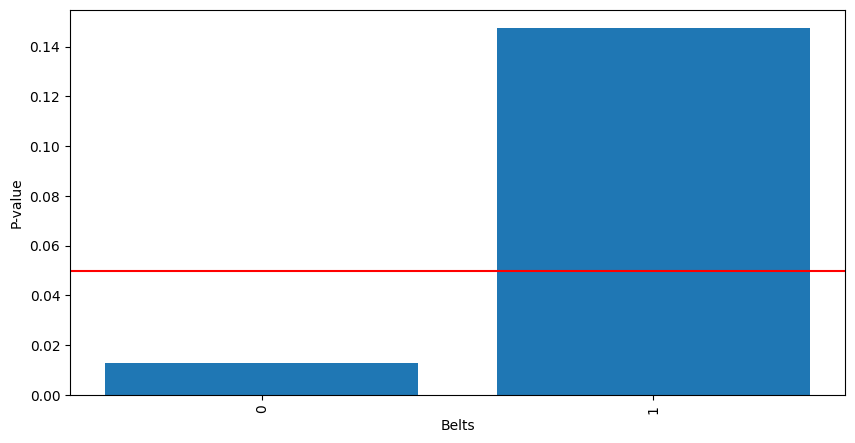

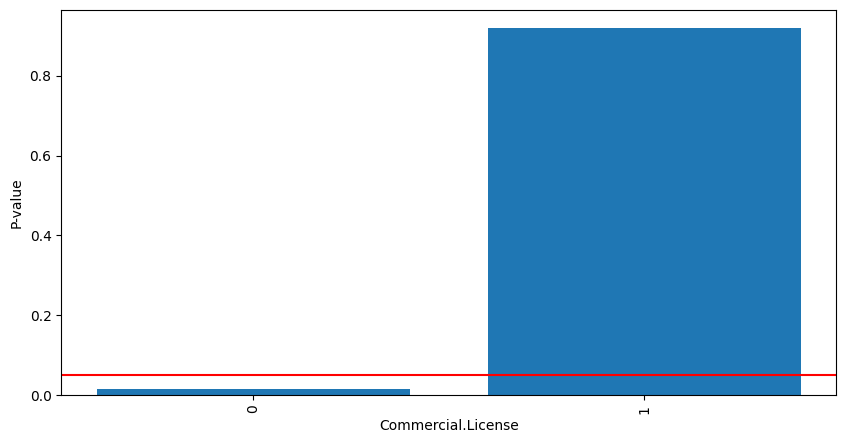

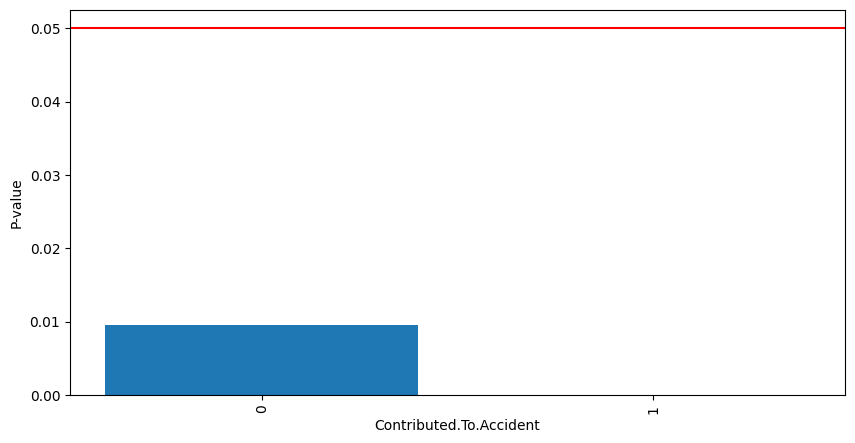

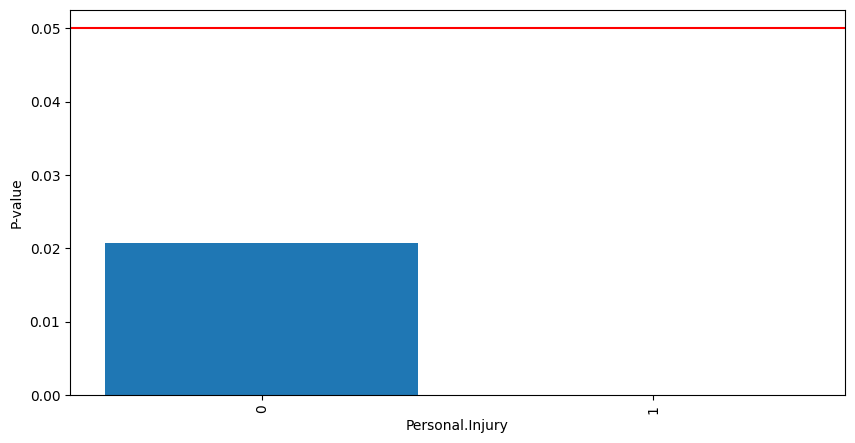

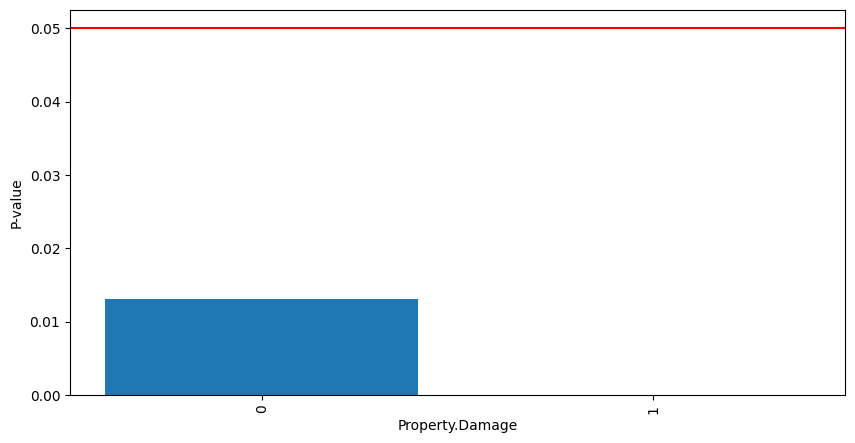

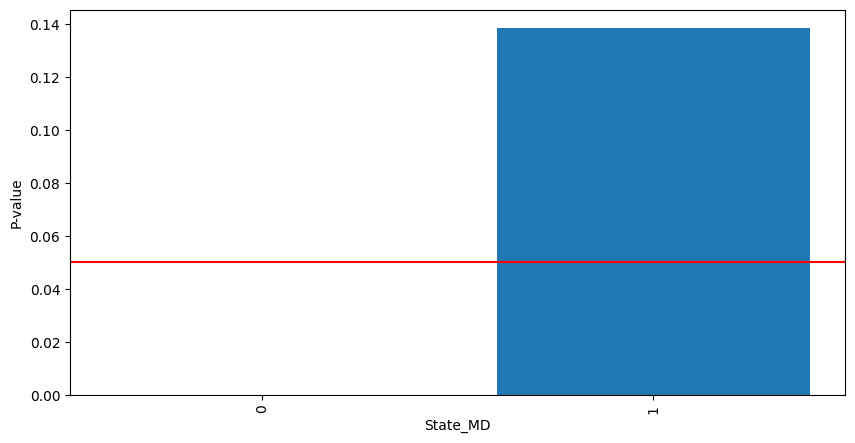

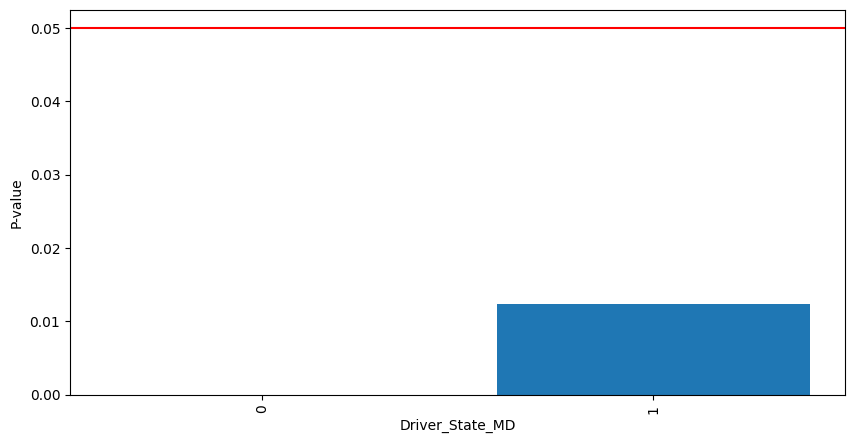

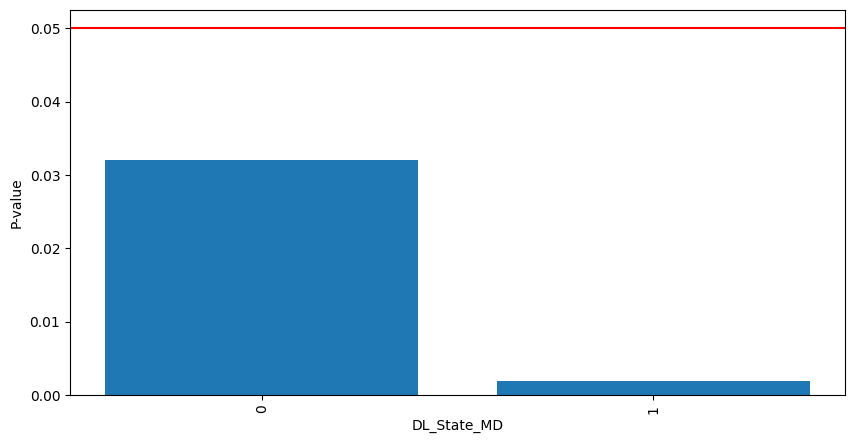

In [14]:
for element in non_ohe:
    fairness_pdp = fairness_pdp_cat(
        model,
        feature=element,
        protected_group="BLACK",
        X=X_test,
        sensitive_values=sensitive_values,
        fig_size=(10, 5),
        p_value_threshold=0.05,
        x_label=element,
    )

### Numerical variables

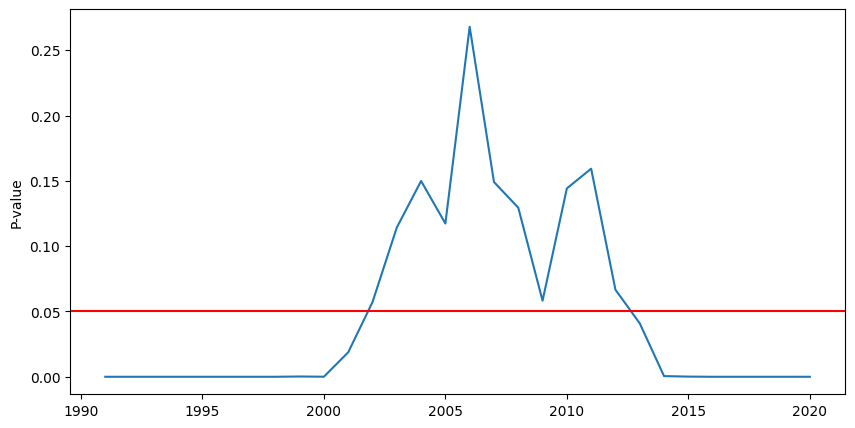

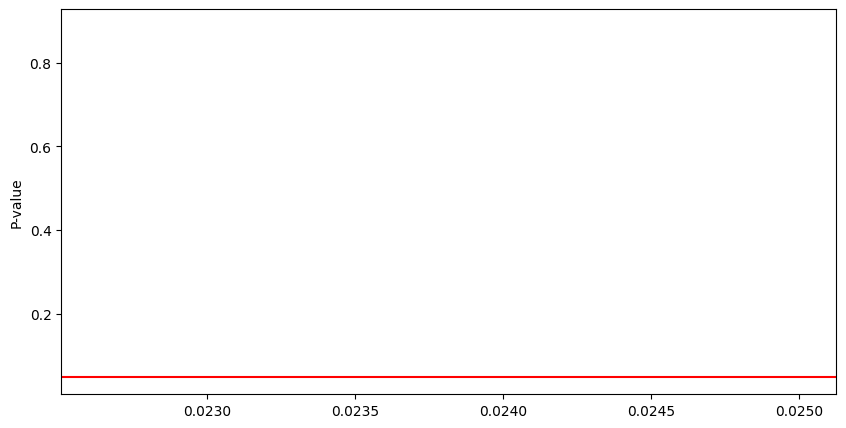

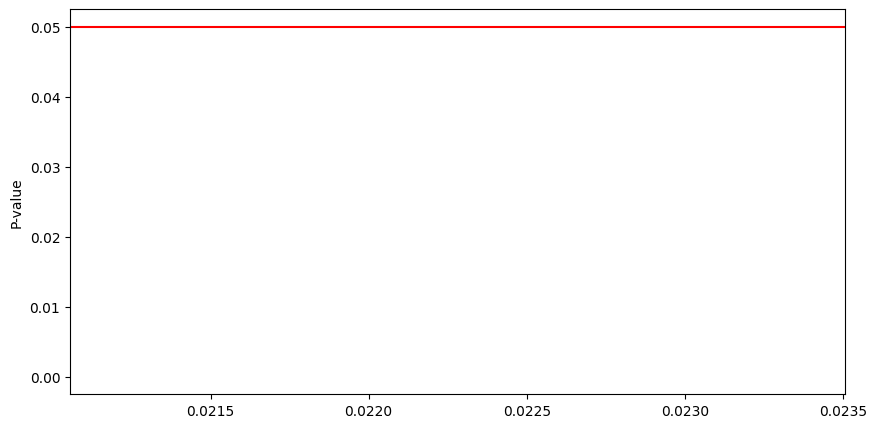

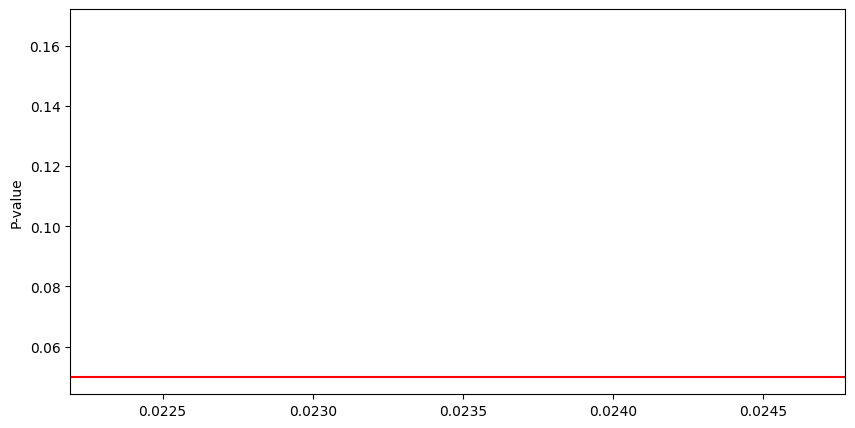

In [15]:
for col in NUM_COLS:
    Year_FPDP = fairness_pdp_num(
        model=model,
        feature=col,
        step=1.0,
        protected_group="BLACK",
        X=X_test,
        sensitive_values=sensitive_values,
        fig_size=(10, 5),
        p_value_threshold=0.05,
    )